# Visualización de datos

    - Una guía completa de los diferentes tipos de gráficas para python se puede encontrar en:
        https://python-graph-gallery.com/

    - Es una herramienta para representar información de manera gráfica. El objetivo principal es facilitar la comprensión de patrones, tendencias y relaciones de los datos, lo cual es fundamental para la toma de decisiones informadas.
    
    - La visualización de datos es útil para:
        1) Facilitar la comprensión; 2) Identificar patrones y tendencias; 3) Comunicar efectivamente;
        4) Tomar decisiones informadas; 5) Explorar los datos; 6) Detectar patrones ocultos;
        7) Presentar informes y stroytelling; 8) Monitorear el rendimiento

In [44]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 1] Cargar la base de datos
    - Se utiliza la base de datos de las primeras 6 generaciones de Pokemon

In [5]:
# Read data
main_folder = os.getcwd()
df_data = pd.read_csv(main_folder + "/Data/Pokemon.csv", index_col=0)
df_data.index.name = "#"
df_data.rename(columns={"Sp. Atk": "Sp. Attack", "Sp. Def": "Sp. Defense"}, inplace=True)
df_data.set_index("Name", inplace=True)

# Define cuantitative columns
features = ["HP", "Attack", "Defense", "Sp. Attack", "Sp. Defense", "Speed"]

# Output
print("="*100,"\nBASE DE DATOS\n",df_data.sample(n=5)[features],"\n","="*100)

BASE DE DATOS
                           HP  Attack  Defense  Sp. Attack  Sp. Defense  Speed
Name                                                                         
Unown                     48      72       48          72           48     48
Buizel                    55      65       35          60           30     85
Celebi                   100     100      100         100          100    100
Staraptor                 85     120       70          50           60    100
TyranitarMega Tyranitar  100     164      150          95          120     71 


### 2.1] UVAR - Histograma *(Histogram)*

    - Un histograma es la representación gráfica de la distribución de una variable. Es un tipo de gráfica de barras que muestra la frecuencia o densidad de puntos de datos en diferentes intervalos o casillas.
    
    - El propósito de un histograma es proveer un resumen visual de la distribución subyacente a una variable continua o discreta

    - Los componentes clave de un histograma son:
        
        - Casillas (intervalos): El rango de valores en que la variable es dividida. Cada casilla representa
        un rango específico y único de valores y a los puntos de datos se les asigna uno en específico.
        - Frecuencia (densidad): El eje vertical del histograma representa la frecuencia o densidad de puntos
        de datos para cada dcasilla. La frecuencia se refiera al conteo de puntos de datos dentro de cada
        casilla.
        
    - Los histogramas son particularmente útiles para para visualizar características de la forma de tendencia central y dispersión de la distribución.

        - Simetría: El histograma está balanceado alrededor del pico c+
        - Sesgo: El histograma se alarga hacia una dirección
        - Tendencia centra: El pico central del histograma representa la moda de la distribución
        - Dispersión: El acnho de la distribución brinda información sobre la variabilidad de los datos

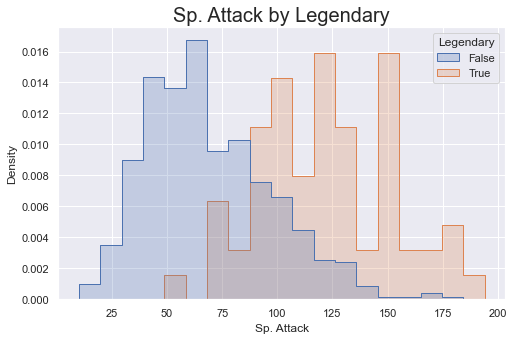

In [31]:
# Create chart
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.histplot(df_data, x="Sp. Attack", hue="Legendary", stat="density", element="step", common_norm=False)
ax.axes.set_title("Sp. Attack by Legendary",fontsize=20);

### 2.2] Gráfica de cajas *(Boxplot)*


    - También conocidas como gráficas de cajas y bigotes, es una representación gráfica de la distribución de un set de datos. Muestra un resumen de las medidas de tendencia central y la dispersión.
    
    - Sus componentes principales son:
        
        - Caja: La caja representa el rango intercuartil (IQR), el cual abarca el 50% de los datos en el centro. El margen inferior y superior muestran el Q1 y Q3 (25% y 75%), mientras que el de en medio muestra la mediana de la distribución.

        - Lineas: Se extienden arriba y debajo de la caja hasta un máximo de 1.5 veces el IQR más allá del Q1 o Q3, o hasta la última observación dentro del rango.
        
        - Outliers: Las observaciones que no quedan dentro de la extensión de las líneas son consideradas outliers y se muestran como puntos de datos.

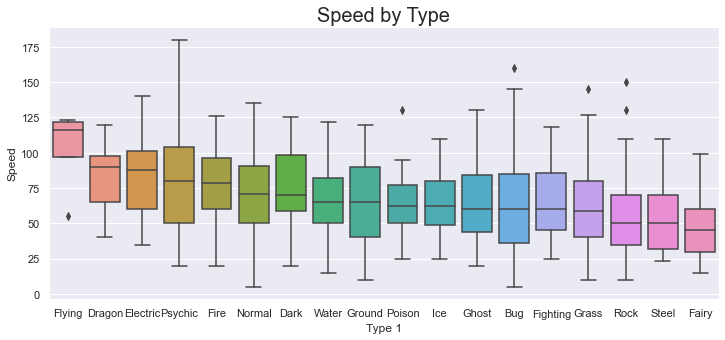

In [84]:
# Create chart
sns.set(rc={'figure.figsize':(12,5)})
temporal = df_data.groupby(by=["Type 1"])["Speed"].median().sort_values(ascending=False)
ax = sns.boxplot(x=df_data["Type 1"], y=df_data["Speed"], order=temporal.index)
ax.axes.set_title("Speed by Type",fontsize=20);

### 2.3] Gráficas cuantil-cuantil *(QQplot)*

    - Es una herramienta gráfica usada para evaluar si un set de datos siguen una distribución particular o teórica. Compara los cuantiles de los datos observados contra los cuantiles de otra distribición.
    
    - En el eje X usualmente se grafica la distribución objetivo y en el y la observada. Si los puntos se 
    alinean siguiendo una recta de 45 grados, se asume que los datos se distribuyen de la misma manera.

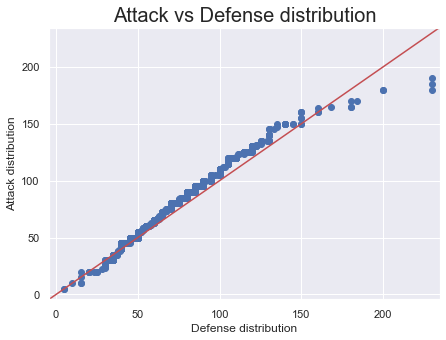

In [46]:
# Create chart
sns.set(rc={'figure.figsize':(7,5)})
pp_x = sm.ProbPlot(df_data["Attack"])
pp_y = sm.ProbPlot(df_data["Defense"])
ax = pp_x.qqplot(other=pp_y, line='45')
plt.xlabel("Defense distribution");
plt.ylabel("Attack distribution")
plt.title("Attack vs Defense distribution", fontsize=20);

### 2.4] Gráficas cuantil-normal *(QQnorm)*

    - Es un caso especial de las gráficas QQplot, donde la distribución objetivo es la normal teórica

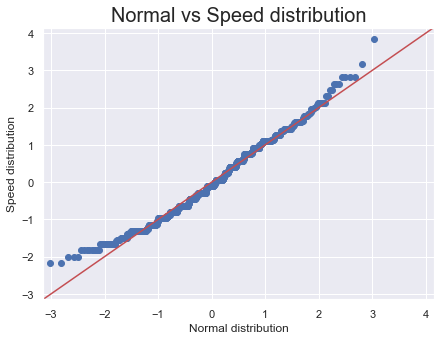

In [45]:
# Create chart
fig = sm.qqplot(df_data["Speed"], line="45", fit=True)
plt.xlabel("Normal distribution");
plt.ylabel("Speed distribution")
plt.title("Normal vs Speed distribution", fontsize=20);

### 2.5] UVAR - Función de distribución empírica *(EDF)*
    - La función de distribución empírica es un concepto estadístico que proporciona un estimado no paramétrico de la distribución de probabilidad de una variable aleatoria, basado en datos observados. En otras palabras, describe la distribución de puntos de datos sin hacer suposiciones de la ditribución subyacente.

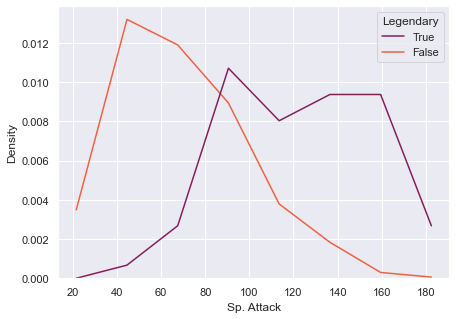

In [41]:
# Create chart
ax = sns.histplot(data=df_data, x="Sp. Attack", hue="Legendary",
         hue_order=[True, False], element="poly", fill=False,
         cumulative=False, stat="density", common_norm=False,
         bins=8, palette="rocket")

### 2.6] UVAR - Función de distribución empírica acumulada *(CEDF)*

    - La función de distribución empírica acumulada es un concepto estadístico que asigna la probabilidad de que una observación sea igual o menor a cierto valor. Es un estimador no paramétrico que no hace suposiciones sobre la distribución subyacente a los datos.

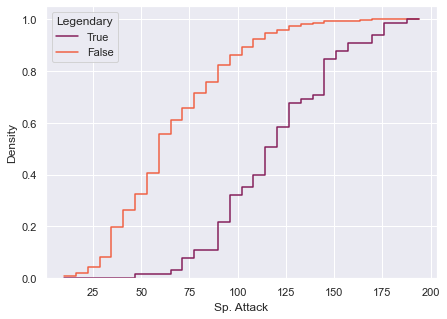

In [42]:
# Create chart
ax = sns.histplot(data=df_data, x="Sp. Attack", hue="Legendary",
         hue_order=[True, False], element="step", fill=False,
         cumulative=True, stat="density", common_norm=False,
         bins=30, palette="rocket")

### 2.7] UVAR - Barras *(Bars plot)*
    
    - Son útiles para representar visualmente y comprar los valores de diferentes vategorías o grupos. Sirven para datos categóricos y mostrar las relaciones o diferencias entre categoróas.

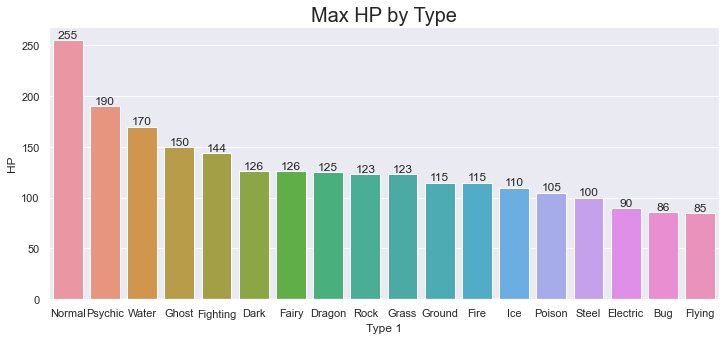

In [34]:
# Create chart
sns.set(rc={"figure.figsize":(12,5)})
temporal = df_data.groupby(["Type 1"])["HP"].max().sort_values(ascending=False)
ax = sns.barplot(x=temporal.index, y=np.round(temporal,0), errorbar=None)
ax.axes.set_title("Max HP by Type",fontsize=20)
ax.bar_label(ax.containers[0]);

### 2.1] MVAR - Histograma bivariado *(bivariate histogram)*

<AxesSubplot:xlabel='HP', ylabel='Speed'>

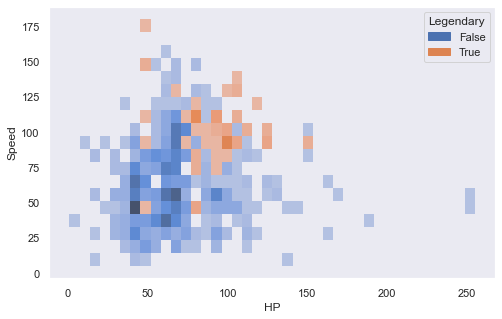

In [77]:
# Create chart
sns.set(rc={"figure.figsize":(8,5)})
sns.set_style("darkgrid", {"grid.color": "1", "grid.linestyle": ""})
sns.histplot(
    df_data, x="HP", y="Speed", hue="Legendary", legend=True, common_norm=True)

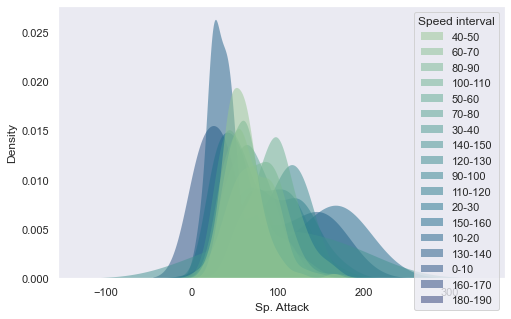

In [97]:
df_data["Speed interval"] = df_data["Speed"].map(lambda x: f'{x//10*10}-{(x//10*10)+10}')
sns.kdeplot(
   data=df_data, x="Sp. Attack", hue="Speed interval",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, warn_singular=False
);

<AxesSubplot:xlabel='Attack', ylabel='Speed'>

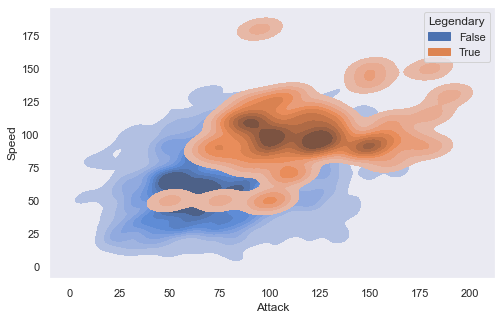

In [86]:
sns.kdeplot(
    data=df_data, x="Attack", y="Speed", hue="Legendary", fill=True, bw_adjust=.5, common_norm=False
)